# Exploring  Popular Data Science Questions
***



Id|PostTypeId|AcceptedAnswerId|Score|ViewCount|Tags|AnswerCount|CommentCount|FavoriteCount
--|----------|----------------|-----|---------|----|-----------|------------|--
45527|1||1|120|`random-forest` `data-cleaning` `encoding` `geospatial`|0|0|
45528|2||0||||1|
45529|2||1||||0|
45530|1||1|151|`deep-learning`|0|0|
45531|2||0||||0|
45532|1||2|86|`classification`|1|3|
45533|1|45537|9|1922|`feature-extraction` `databases`|4|2|1
45534|2||2||||1|
45536|2||1||||5|
45537|2||4||||4|


id|Name
--|----
1|Question
2|Answer
3|Wiki
4|TagWikiExcerpt
5|TagWiki
6|ModeratorNomination
7|WikiPlaceholder
8|PrivilegeWiki

To figure out which of them are relevant to us, let's check how many of them there are:

```
SELECT PostTypeId, 
       COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId;
 ```
Let's read the results of this query into pandas. Before doing so, we'll import all the libraries necessary for the future analysis:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno 
import operator
from functools import reduce

pd.read_csv('QueryResults.csv', index_col='PostTypeId')

,NrOfPosts
PostTypeId,
1,26584
2,30267
4,248
5,248
6,11
7,1


Hence, due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us.

Let's move on to the next table of potential interest for us.

#### `Tags`

```
SELECT TOP 5 Id, 
              TagName, 
              Count
  FROM Tags
 ORDER BY Count DESC;
```

In [2]:
pd.read_csv('QueryResults_2.csv')

,Id,TagName,Count
0,2,machine-learning,8571
1,46,python,4985
2,81,neural-network,3566
3,194,deep-learning,3557
4,77,classification,2441


```
SELECT TOP 5 Id, 
              TagName, 
              Count
  FROM Tags
 ORDER BY Count;
```

In [3]:
pd.read_csv('QueryResults_3.csv')

,Id,TagName,Count
0,576,ibm-watson,1
1,898,sap,1
2,969,pdp,1
3,970,shiny,1
4,977,generlized-advantaged-estimation,1


We see again the same extremely popular tags, and also the opposite: the most unpopular ones and having only one question tagged with each.

#### `TagSynonyms`

```
SELECT Id, 
       SourceTagName, 
       TargetTagName, 
       CreationDate, 
       OwnerUserId
  FROM TagSynonyms;
```

In [4]:
pd.read_csv('QueryResults_4.csv')

,Id,SourceTagName,TargetTagName,CreationDate,OwnerUserId
0,1,spark,apache-spark,2015-07-08 11:45:06,21
1,2,software-recommendation,software-recommentation,2015-07-31 08:33:01,21
2,3,pig,apache-pig,2015-08-02 07:36:44,21
3,4,data-visualization,visualization,2015-11-28 08:55:18,21
4,5,parallelism,parallel,2016-01-15 22:03:10,21
5,6,hadoop,apache-hadoop,2016-10-09 08:45:45,21
6,8,neuralnetwork,neural-network,2017-02-22 16:30:33,21
7,9,recommendation,recommender-system,2017-05-19 16:14:12,21
8,10,scikit,scikit-learn,2017-07-20 11:34:00,21
9,11,sklearn,scikit-learn,2017-07-20 11:34:18,21


Few tags have synonyms, introduced by users with special permissions.
## Data Extraction and Exploration
To narrow our research, we'll focus for now on the **recent** posts that represent **questions**. Hence, we'll select from the table `Posts` only the posts with `PostTypeId`=1 and created in 2020 (at the time of writing it, it's early 2021).

```
SELECT Id, 
       CreationDate,
       AcceptedAnswerId, 
       Score, 
       ViewCount, 
       Tags, 
       AnswerCount, 
       CommentCount, 
       FavoriteCount   
  FROM Posts
 WHERE PostTypeId=1
   AND CreationDate LIKE '%2020%';
```

In [5]:
questions_2020 = pd.read_csv('questions_2020.csv')
questions_2020.head()

,Id,CreationDate,AcceptedAnswerId,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,65740,2020-01-02 16:17:29,65742.0,4,113,<logistic-regression>,1,0,NaN
1,65745,2020-01-02 17:07:11,65748.0,2,78,<neural-network><normalization>,1,0,NaN
2,65746,2020-01-02 17:19:49,65780.0,0,93,<machine-learning><python><multilabel-classifi...,1,1,NaN
3,65747,2020-01-02 17:24:58,65772.0,2,465,<python><computer-vision><opencv>,1,0,NaN
4,65751,2020-01-02 18:22:09,65779.0,3,74,<reinforcement-learning>,1,0,NaN


It seems that the `FavoriteCount` column contains a lot of missing values. Let's check it, as well as the missing values in the whole dataframe:

Number of questions asked in 2020:  7659


MISSING VALUES %:
Id                   0.0
CreationDate         0.0
AcceptedAnswerId    75.0
Score                0.0
ViewCount            0.0
Tags                 0.0
AnswerCount          0.0
CommentCount         0.0
FavoriteCount       88.0
dtype: float64


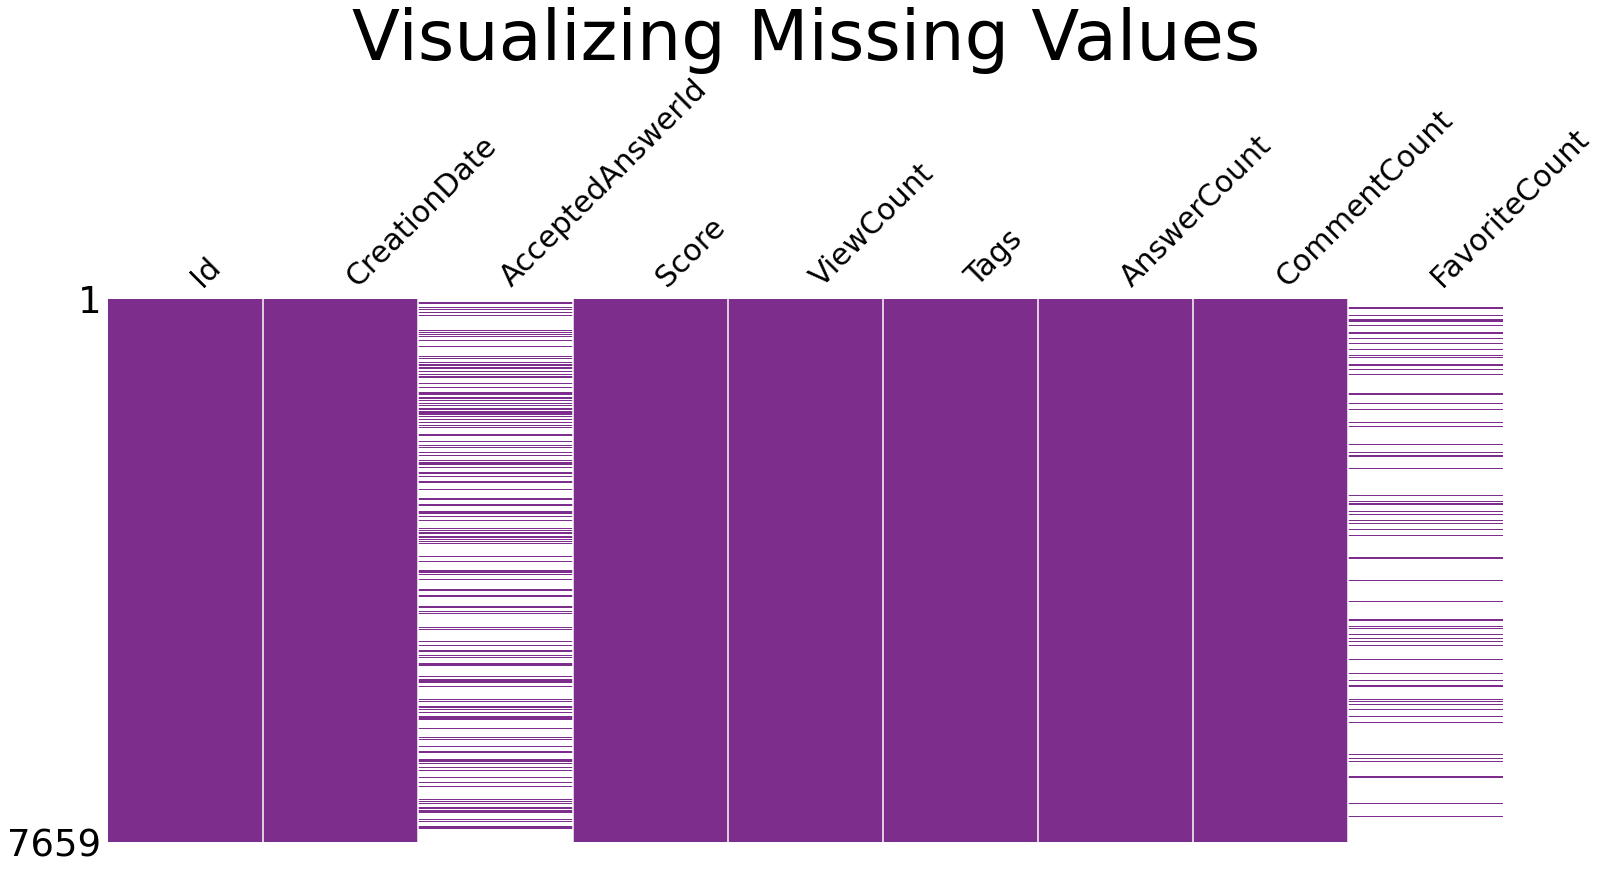

In [6]:
# Checking the number of entries
print('Number of questions asked in 2020: ', len(questions_2020))
print('\n')

# Checking missing values
print(
      f'MISSING VALUES %:\n{round(100 * questions_2020.isnull().sum()/len(questions_2020))}'
      )

# Visualizing missing values by means of the missingno library
msno.matrix(
            questions_2020, 
            fontsize=30, 
            color=(0.494, 0.184, 0.556), 
            sparkline=False,
            inline=False
            ) 
plt.title('Visualizing Missing Values', fontsize=70)
plt.show()

Only 2 columns, `AcceptedAnswerId` and `FavoriteCount`, have missing values (75% and 88% correspondingly). In the first case we don't have any way to fix it, so we'll have to drop this column. In the second case we're going to fill the missing values with 0.

In [7]:
questions_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7659 non-null   int64  
 1   CreationDate      7659 non-null   object 
 2   AcceptedAnswerId  1909 non-null   float64
 3   Score             7659 non-null   int64  
 4   ViewCount         7659 non-null   int64  
 5   Tags              7659 non-null   object 
 6   AnswerCount       7659 non-null   int64  
 7   CommentCount      7659 non-null   int64  
 8   FavoriteCount     916 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 538.6+ KB


We see that some columns have inadequate data types. We're going to fix it soon, according to the following scheme:

Column|Data type
-|-
CreationDate|datetime
Tags|object
all the others|int

## Data Cleaning
First, we're going to deal with missing values: to drop the `AcceptedAnswerId` column and to fill with 0 the missing values in the `FavoriteCount` column.

In [8]:
# Dropping the column 
questions_2020 = questions_2020.drop(['AcceptedAnswerId'], axis=1)

# Filling the missing values with 0
questions_2020['FavoriteCount'] = questions_2020['FavoriteCount'].fillna(0)

Next, we are going to fix the wrong data types according to the scheme above:

In [9]:
# Converting data types
questions_2020['CreationDate'] = questions_2020['CreationDate'].astype('datetime64')
questions_2020['FavoriteCount'] = questions_2020['FavoriteCount'].astype('int64')

# Double-checking modified data types
questions_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7659 non-null   int64         
 1   CreationDate   7659 non-null   datetime64[ns]
 2   Score          7659 non-null   int64         
 3   ViewCount      7659 non-null   int64         
 4   Tags           7659 non-null   object        
 5   AnswerCount    7659 non-null   int64         
 6   CommentCount   7659 non-null   int64         
 7   FavoriteCount  7659 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 478.8+ KB


Finally, let's clean the `Tags` column to fit our purposes. Currently, the values in this column are strings that look like this:

In [10]:
questions_2020.loc[2,'Tags']

'<machine-learning><python><multilabel-classification><natural-language-process>'

We're going to transform them into lists of strings, to make them more suitable to use typical string methods.

In [11]:
# Transforming values in the `Tags` column into lists of strings
questions_2020['Tags'] = questions_2020['Tags'].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')\
                                               .str.split(',')

# Double-checking the results
print(questions_2020.loc[2,'Tags'])
questions_2020.head()

['machine-learning', 'python', 'multilabel-classification', 'natural-language-process']


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,65740,2020-01-02 16:17:29,4,113,[logistic-regression],1,0,0
1,65745,2020-01-02 17:07:11,2,78,"[neural-network, normalization]",1,0,0
2,65746,2020-01-02 17:19:49,0,93,"[machine-learning, python, multilabel-classifi...",1,1,0
3,65747,2020-01-02 17:24:58,2,465,"[python, computer-vision, opencv]",1,0,0
4,65751,2020-01-02 18:22:09,3,74,[reinforcement-learning],1,0,0


## Exploring Most Popular Tags

In [12]:
questions_2020[['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,7659.000000,7659.000000,7659.000000,7659.000000
mean,0.848805,111.624363,0.764199,0.136441
std,1.440058,455.626956,0.807718,0.482174
min,-4.000000,2.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000
50%,1.000000,32.000000,1.000000,0.000000
75%,1.000000,62.000000,1.000000,0.000000
max,34.000000,17193.000000,10.000000,10.000000


In [13]:
# Creating a dictionary for all the tags
tags_used_dict = {}
for lst in questions_2020['Tags']:
    for tag in lst:
        if not tag in tags_used_dict:
            tags_used_dict[tag] = 0
        tags_used_dict[tag] += 1   
        
# Defining a function for creating a dataframe from a dictionary, 
# sorted in descending order
def create_sorted_df_from_dict(dictionary, new_df_column_name):
    
    # Creating a dataframe from the dictionary
    df = pd.DataFrame.from_dict(dictionary, orient='index').reset_index() 

    # Renaming columns
    df.columns = ['Tag', new_df_column_name]

    # Sorting in descending order
    df = df.sort_values(new_df_column_name, ascending=False).reset_index(drop=True)
    return df, df.head(10)

# Creating 2 dataframes: tags with the corresponding counts and the TOP10 used tags
tags_used, top10_used = create_sorted_df_from_dict(
                                                   dictionary=tags_used_dict,
                                                   new_df_column_name='Count'
                                                   )  

top10_used

,Tag,Count
0,machine-learning,2225
1,python,1435
2,deep-learning,1085
3,neural-network,889
4,keras,696
5,classification,648
6,tensorflow,590
7,nlp,525
8,scikit-learn,510
9,time-series,400


In [14]:
# Defining a function for finding popular tags by column
def find_popular_tags(column_name, new_df_column_name):

    # Creating a dictionary for all the tags
    tags_dict = {}
    for index, row in questions_2020.iterrows():
        lst = row['Tags']
        popularity_measure = row[column_name]
        for tag in lst:
            if not tag in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
            
    # Creating a dataframe from the dictionary, sorted in descending order
    tags_df, top10_df = create_sorted_df_from_dict(
                                                   tags_dict, 
                                                   new_df_column_name
                                                   )            
    return tags_df, top10_df

# Creating 2 dataframes for each popularity measures: scores, views, answers, 
# and favorite marks (for all tags and TOP10)
tags_scores, top10_scored = find_popular_tags(
                                              column_name='Score', 
                                              new_df_column_name='Scores'
                                              )
tags_views, top10_viewed = find_popular_tags(
                                             column_name='ViewCount', 
                                             new_df_column_name='Views'
                                             )
tags_answers, top10_answered = find_popular_tags(
                                                 column_name='AnswerCount', 
                                                 new_df_column_name='Answers'
                                                 )
tags_favorite, top10_favorite = find_popular_tags(
                                                  column_name='FavoriteCount', 
                                                  new_df_column_name='Favorite Count'
                                                  )

# Creating a list of dataframes for all tags:
dataframes = [
              tags_used, 
              tags_scores, 
              tags_views, 
              tags_answers, 
              tags_favorite
              ]

# Merging dataframes for all tags:
tags_merged = reduce(lambda left,right: pd.merge(
                                                 left,right,on=['Tag'],
                                                 how='outer', 
                                                 left_index=True, 
                                                 right_index=True
                                                 ), 
                                        dataframes)

tags_merged.head()

,Tag,Count,Scores,Views,Answers,Favorite Count
0,machine-learning,2225,2147,238626,1921,368
1,python,1435,1045,230325,1172,166
2,deep-learning,1085,844,135281,756,135
3,neural-network,889,753,103593,668,122
4,keras,696,629,95071,571,95


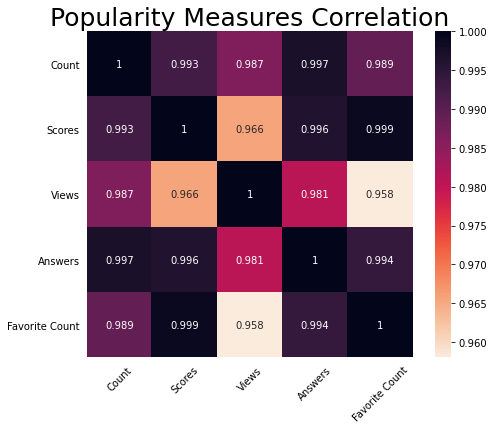

In [15]:
# Creating a correlation heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(
                 tags_merged.corr(),
                 annot=True,
                 fmt='.3g', 
                 square=True,
                 cmap = sns.cm.rocket_r
                 )
ax.set_title('Popularity Measures Correlation', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(bottom=False, left=False)

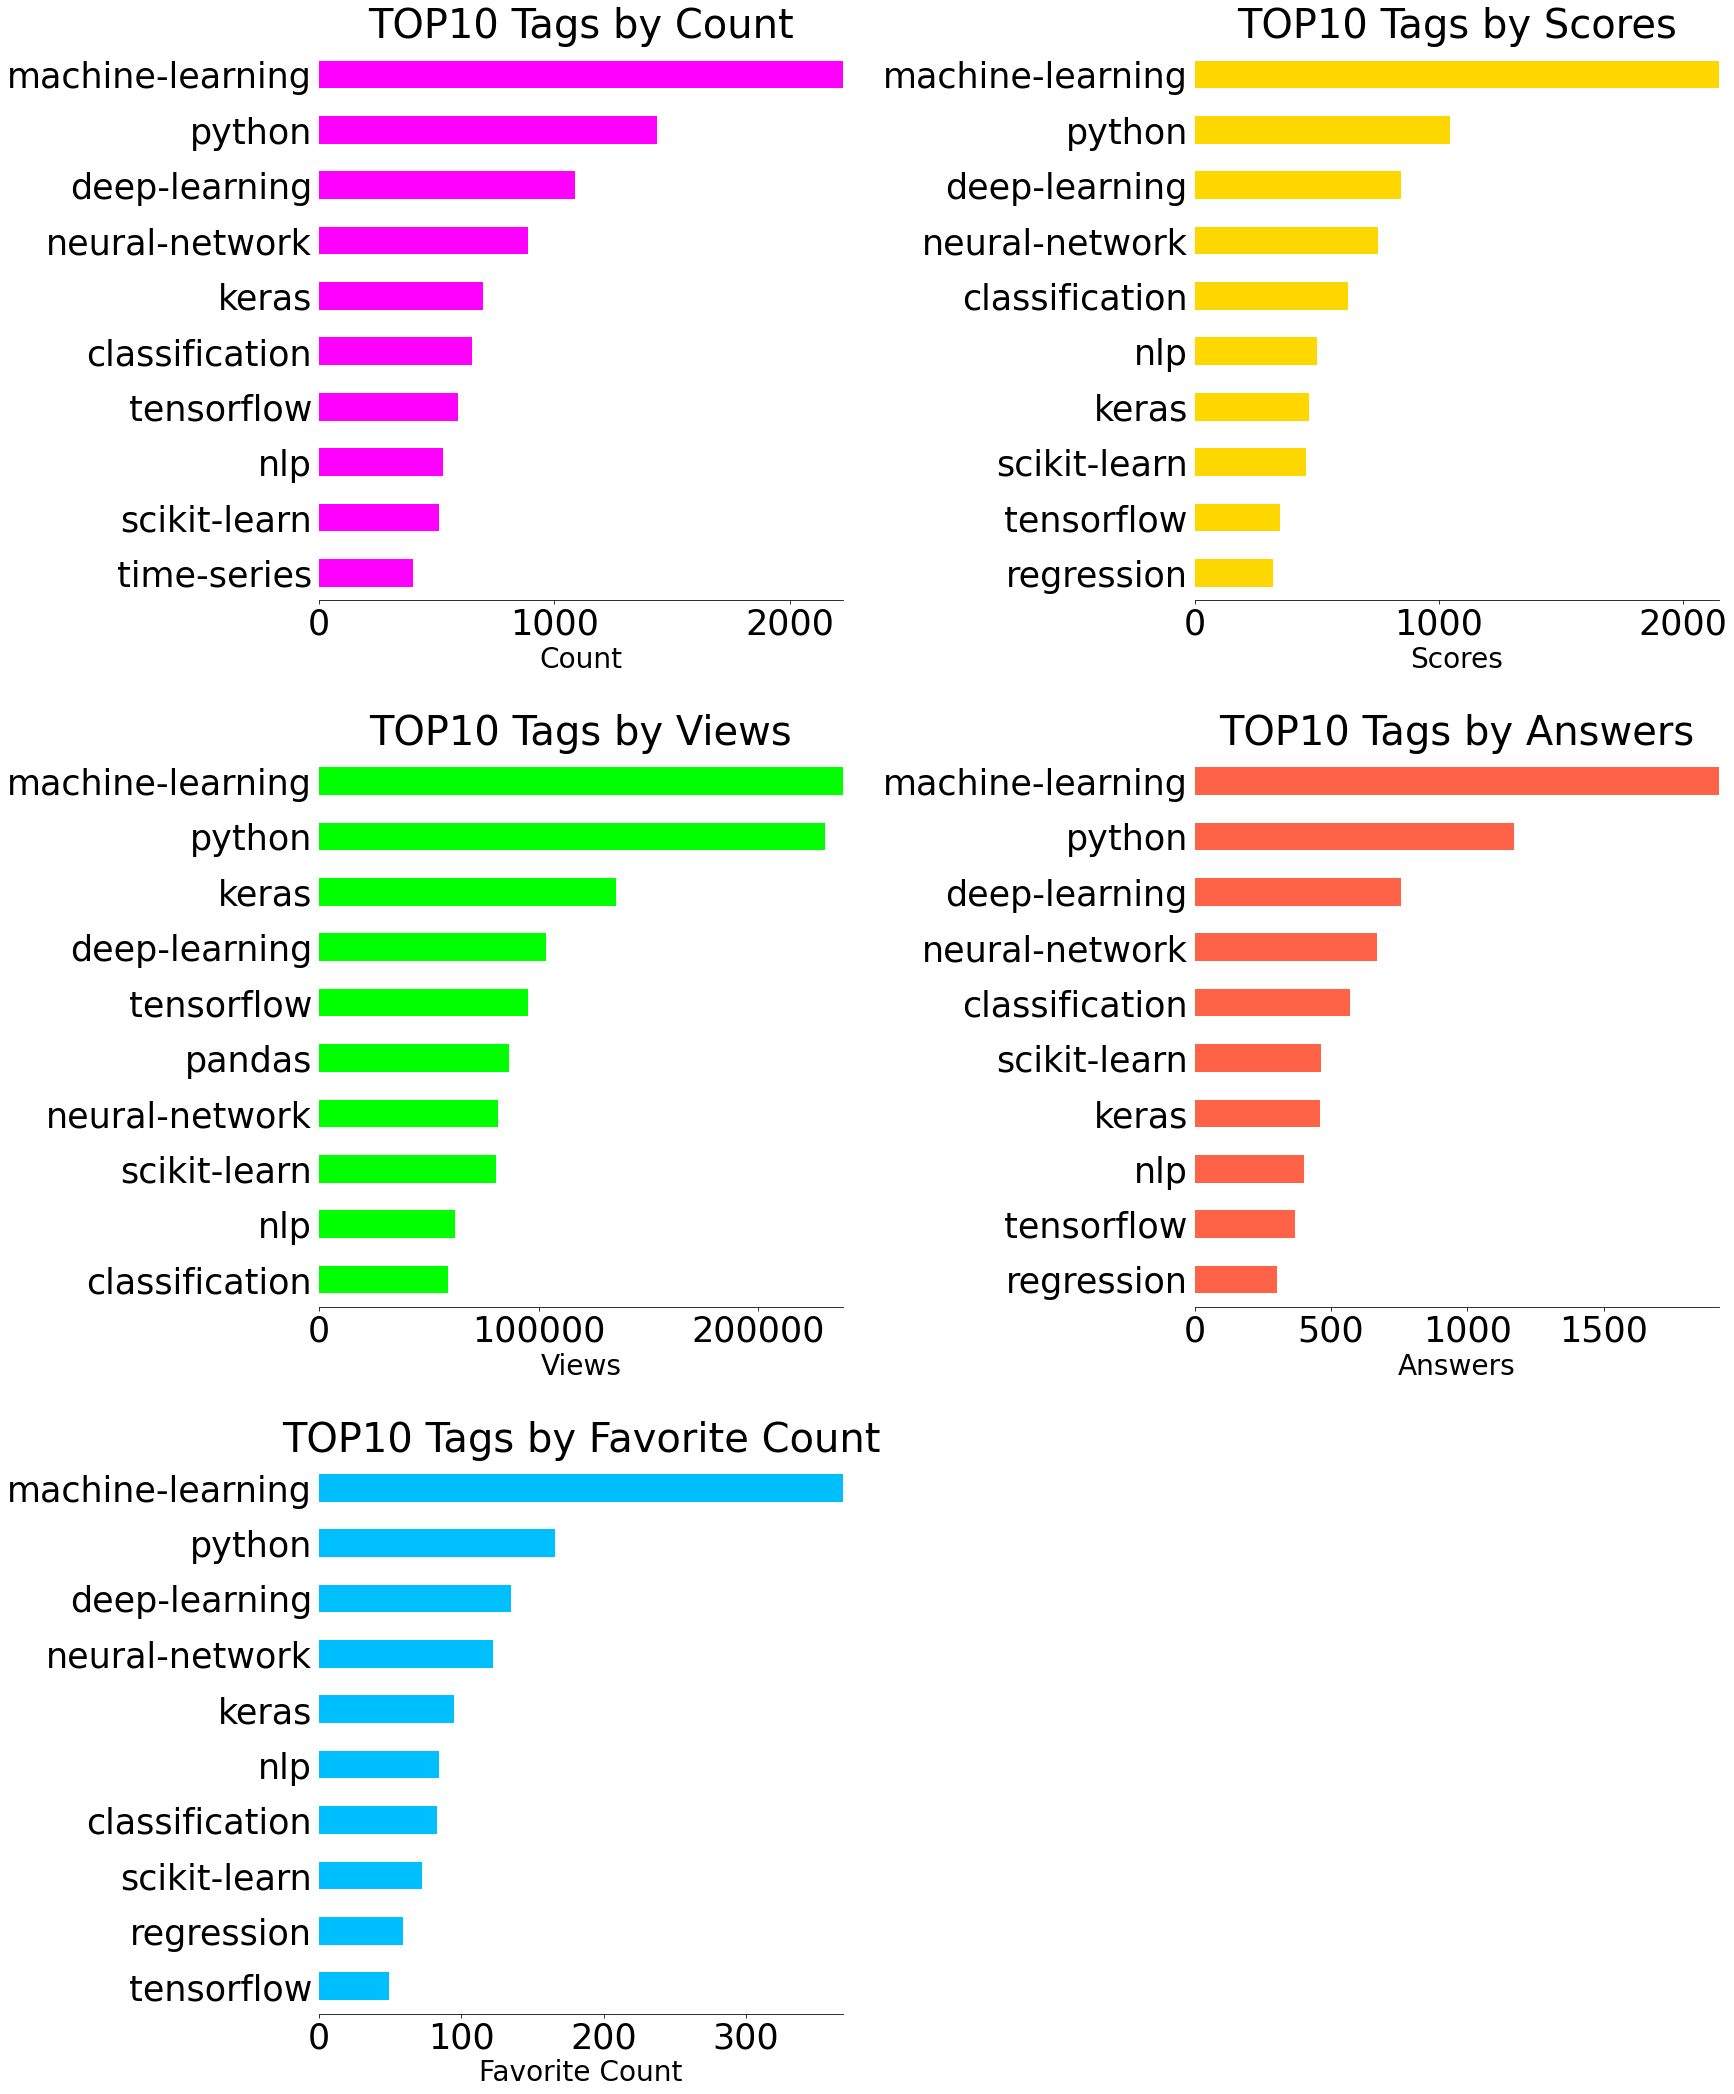

In [16]:
# Creating a list of the TOP10 dataframes
dataframes_top10 = [
                    top10_used, 
                    top10_scored,
                    top10_viewed,                     
                    top10_answered, 
                    top10_favorite
                    ]

# Creating a list of colors, and empty lists for the TOP10 dataframes 
# (with the reset index), columns to be used, plot titles, and x-axis limits
dfs = []
columns = []
titles = []
xlims = []
colors = ['magenta', 'gold', 'lime', 'tomato', 'deepskyblue']

# Filling the empty lists
for df in dataframes_top10:
    dfs.append(df.copy().set_index('Tag', drop=True))
    columns.append(df.columns[1])
    titles.append(f'TOP10 Tags by {df.columns[1]}')
    xlims.append(df.max().tolist()[1])

# Creating horizontal bar plots for all the TOP10 dataframes
fig = plt.figure(figsize=(25, 30))
for i in range(0,5):
    ax = fig.add_subplot(3,2,i+1)   
    dfs[i][columns[i]].sort_values().plot.barh(
                                               color=colors[i],
                                               xlim=(0, xlims[i]),
                                               rot=0
                                               )
    ax.set_title(titles[i], fontsize=40)
    ax.set_ylabel(None)
    ax.set_xlabel(columns[i], fontsize=28)
    ax.tick_params(axis='both', labelsize=35, left = False)
    for j in ['top', 'right', 'left']:
        ax.spines[j].set_visible(False)
    plt.tight_layout(pad=4)      

In [17]:
# Creating a merged dataframe for all the TOP10 dataframes
top10_merged = reduce(lambda left,right: pd.merge(
                                                  left,right,on=['Tag'],
                                                  how='inner'), 
                                         dataframes_top10)

print('Number of tags occured in all the TOP10 dataframes: ', 
      len(top10_merged))
top10_merged

Number of tags occured in all the TOP10 dataframes:  9


,Tag,Count,Scores,Views,Answers,Favorite Count
0,machine-learning,2225,2147,238626,1921,368
1,python,1435,1045,230325,1172,166
2,deep-learning,1085,844,103593,756,135
3,neural-network,889,753,81584,668,122
4,keras,696,469,135281,458,95
5,classification,648,629,58519,571,83
6,tensorflow,590,348,95071,367,49
7,nlp,525,500,61993,400,84
8,scikit-learn,510,455,80564,463,72


                Tag     Count    Scores     Views   Answers  Favorite Count
0  machine-learning  1.000000  1.000000  1.000000  1.000000        1.000000
1            python  0.644944  0.486726  0.965213  0.610099        0.451087
2     deep-learning  0.487640  0.393107  0.434123  0.393545        0.366848
3    neural-network  0.399551  0.350722  0.341891  0.347736        0.331522
4             keras  0.312809  0.218444  0.566916  0.238417        0.258152
5    classification  0.291236  0.292967  0.245233  0.297241        0.225543
6        tensorflow  0.265169  0.162087  0.398410  0.191046        0.133152
7               nlp  0.235955  0.232883  0.259791  0.208225        0.228261
8      scikit-learn  0.229213  0.211924  0.337616  0.241020        0.195652


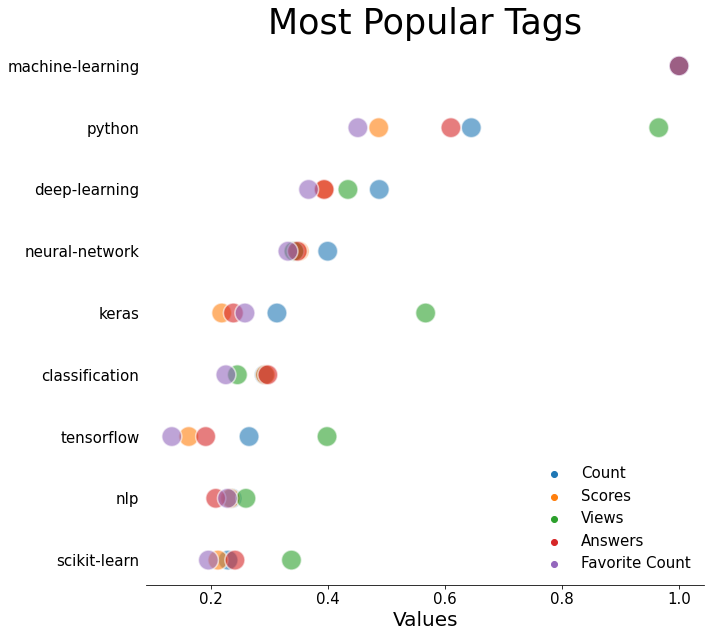

In [18]:
# Normalizing the merged dataframe
top10_merged_normalized = top10_merged.copy()
columns = top10_merged_normalized.columns.tolist()[1:]
for column in columns:
    top10_merged_normalized[column] =\
    top10_merged_normalized[column] / top10_merged_normalized[column].abs().max() 
  
print(top10_merged_normalized)

# Creating a melted dataframe from the merged dataframe for further plotting
top10_melted = pd.melt(
                       top10_merged_normalized, 
                       id_vars=['Tag'], 
                       value_vars=columns
                       )

# Renaming columns
top10_melted.columns = ['Tag', 'PopularityMeasure', 'Value']

# Creating a dot plot for the most popular tags
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(
                     data=top10_melted, 
                     x='Value', 
                     y='Tag', 
                     hue='PopularityMeasure',
                     s=400,
                     alpha=0.6
                     )
ax.set_title('Most Popular Tags', fontsize=35)
ax.set_xlabel('Values', fontsize=20)
ax.set_ylabel(None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(left=False)
ax.legend(loc=4, fontsize=15, frameon=False)
sns.despine(left=True)
plt.show()


## Analysing Interest in Deep Learning across Time
To track the interest in this topic across time, we're going to return to the DSSE database and run a query that fetches all of the questions ever asked on DSSE, their dates and tags:
```
SELECT Id, 
       CreationDate, 
       Tags
  FROM posts
 WHERE PostTypeId = 1;
```
The results of this query is read in a dataframe:

In [19]:
questions_all = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
questions_all.head()

,Id,CreationDate,Tags
0,48282,2019-03-31 02:03:57,<python><data-mining><cross-validation>
1,48286,2019-03-31 05:54:52,<classification><clustering><multilabel-classi...
2,48287,2019-03-31 10:51:35,<python><tensorflow><dataset><annotation>
3,48288,2019-03-31 11:33:53,<apache-hadoop>
4,48289,2019-03-31 11:53:14,<machine-learning><nlp><data-science-model><nltk>


Before starting our analysis, we have to transform the `Tags` column in a similar manner as we did earlier:


In [20]:
# Transforming values in the `Tags` column into lists of strings
questions_all['Tags'] = questions_all['Tags'].str.replace('><',',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')\
                                             .str.split(',')

# Double-checking the results
print(questions_all.loc[2,'Tags'])
questions_all.head()

['python', 'tensorflow', 'dataset', 'annotation']


,Id,CreationDate,Tags
0,48282,2019-03-31 02:03:57,"[python, data-mining, cross-validation]"
1,48286,2019-03-31 05:54:52,"[classification, clustering, multilabel-classi..."
2,48287,2019-03-31 10:51:35,"[python, tensorflow, dataset, annotation]"
3,48288,2019-03-31 11:33:53,[apache-hadoop]
4,48289,2019-03-31 11:53:14,"[machine-learning, nlp, data-science-model, nltk]"


In [21]:
# Creating a list of all the tags ever used
all_tags = []
for lst in questions_all['Tags']:
    for item in lst:
        if item not in all_tags:
            all_tags.append(item)

# Creating a list of sets of tags for each question that has `deep-learning`
# as one of the tags
dl_tags = []
for lst in questions_all['Tags']:
    if 'deep-learning' in lst:
        dl_tags.append(lst)

# Creating a dictionary of all the tags used in combination with `deep-learning`
# and their frequencies
dl_tags_dict = {}
for lst in dl_tags:
    for item in lst:
        if item not in dl_tags_dict:
            dl_tags_dict[item]=0
        dl_tags_dict[item] += 1

# Sorting the dictionary
sorted_dl_tags_dict= dict(sorted(
                                 dl_tags_dict.items(), 
                                 reverse=True, 
                                 key=operator.itemgetter(1)
                                 ))
                                 
# Creating a list of all the tags that were used with the `deep-learning` tag,
# but sometimes were used also without it
dl_tags_not_exclusive = []
for lst in questions_all['Tags']:
    for item in list(dl_tags_dict.keys())[1:]: # avoiding checking `deep-learning` itself
         if 'deep-learning' not in lst and item in lst and item not in dl_tags_not_exclusive:
                dl_tags_not_exclusive.append(item)

# Printing the statistics and the dictionary
print('Number of all the questions in the DSSE:',  '\n',
      len(questions_all), '\n', '\n',
      'Number of questions with the `deep-learning` tag:', '\n', 
      len(dl_tags), '\n', '\n',
      'Overall number of all the tags in the DSSE database:', '\n', 
      len(all_tags), '\n', '\n',
      'Number of unique tags associated with `deep-learning`:',  '\n', 
      len(dl_tags_dict), '\n','\n',
      'Number of unique tags associated with `deep-learning`, but sometimes used without:', '\n',
      len(dl_tags_not_exclusive), '\n', '\n',  
      sorted_dl_tags_dict)

Number of all the questions in the DSSE: 
 26853 
 
 Number of questions with the `deep-learning` tag: 
 3544 
 
 Overall number of all the tags in the DSSE database: 
 614 
 
 Number of unique tags associated with `deep-learning`: 
 381 
 
 Number of unique tags associated with `deep-learning`, but sometimes used without: 
 376 
 
 {'deep-learning': 3544, 'machine-learning': 1490, 'neural-network': 1143, 'keras': 665, 'tensorflow': 506, 'cnn': 409, 'python': 408, 'lstm': 240, 'classification': 217, 'nlp': 212, 'computer-vision': 192, 'convnet': 191, 'image-classification': 171, 'rnn': 133, 'time-series': 119, 'convolution': 108, 'pytorch': 95, 'reinforcement-learning': 91, 'dataset': 87, 'loss-function': 85, 'object-detection': 81, 'training': 79, 'autoencoder': 77, 'data-mining': 72, 'gan': 71, 'regression': 69, 'image-recognition': 61, 'natural-language-process': 60, 'predictive-modeling': 57, 'gradient-descent': 55, 'recurrent-neural-net': 55, 'backpropagation': 54, 'word-embedding

In [22]:
dl_related_tags = {
                   'deep-learning': 3544,
                   'neural-network': 1143,
                   'keras': 665,
                   'cnn': 409,
                   'lstm': 240,
                   'convnet': 191,
                   'rnn': 133,
                   'autoencoder': 77,
                   'gan': 71,
                   'recurrent-neural-net': 55,
                   'backpropagation': 54,
                   'activation-function': 48,
                   'gpu': 42,
                   'deep-network': 39,
                   'dqn': 30,
                   'yolo': 28,
                   'mlp': 24,
                   'attention-mechanism': 23,
                   'dropout': 22,
                   'vgg16': 15,
                   'inception': 14,
                   'mini-batch-gradient-descent': 12,
                   'faster-rcnn': 11,
                   'gru': 10,
                   'caffe': 10,
                   'perceptron': 8,
                   'rbm': 8,
                   'stacked-lstm': 6,
                   'inceptionresnetv2': 6,
                   'ann': 6,
                   'alex-net': 6,
                   'siamese-networks': 5,
                   'neural-style-transfer': 4,
                   'pooling': 4,
                   'graph-neural-network': 4,
                   'vae': 3,
                   'fastai': 3,
                   'cs231n': 3,
                   'pretraining': 2,
                   'tflearn': 2,
                   'gnn': 2,
                   'allennlp': 1,
                   'rmsprop': 1,
                   'keras-rl': 1,
                   'pytorch-geometric': 1,
                   'mxnet': 1,
                  }

print('Number of tags specific to deep learning: ', len(dl_related_tags))

Number of tags specific to deep learning:  46


Since we're going to track the interest in deep learning across time, let's take a look at the `CreationDate` column of our dataframe. In particular, we're interested in the dates of the first and the last (currently) questions on the DSSE.

In [23]:
print('First question asked: ', questions_all['CreationDate'].min(),
      '\n',
      'Last question asked: ', questions_all['CreationDate'].max())

First question asked:  2014-05-13 23:58:30 
 Last question asked:  2021-01-16 21:19:03


Google resources (for example, [this article](https://arxiv.org/pdf/1702.07800.pdf) and many others) show that the era of deep learning started in 2006. As we can see, the first question on the DSSE was asked in 2014, i.e. much later, so we can easily use the infomation from our dataframe starting exactly from the first question, not being worried about any potential discrepancies in the dates. As for the upper limit of our timeframe, we have to decide first on the time periods into which to divide the data. Quarters seem to be a good choice for our purposes, hence, since now it's January 2021, we have to exclude all the questions starting from the 1st of January 2021 inclusive, for the sake of consistency.

In [24]:
# Removing all the entries related to 2021
questions_all = questions_all[questions_all['CreationDate'].dt.year < 2021]

Now, we're going to add to our dataframe 2 additional columns for further plotting: 
- `DL`- showing if a tag is related to deep learning or not,
- `YearQuarter` - representing the year and the quarter when each question was asked.

In [25]:
# Creating a list from the dictionary of the tags associated with deep learning
dl_related_tags_list = list(dl_related_tags.keys())

# Defining a function for labeling questions as related to deep learning or not
def classify_dl(tags):
    for tag in tags:
        if tag in dl_related_tags_list:
            return 1
    return 0

# Defining a function for extracting the year and quarter
def extract_year_quarter(dt):
    quarter = ((dt.month-1) // 3) + 1
    return f'{dt.year}_Q_{quarter}'

# Creating the columns `DL` and `YearQuarter`
questions_all['DL'] = questions_all['Tags'].apply(classify_dl)
questions_all['YearQuarter'] = questions_all['CreationDate'].apply(extract_year_quarter)

Let's create a dataframe summarizing questions by quarter.

In [26]:
# Creating a dataframe summarizing questions by quarter
questions_by_quarter = questions_all.groupby('YearQuarter').agg({'DL': ['sum', 'count']})

# Renaming the columns
questions_by_quarter.columns = ['dl_questions', 'all_questions']

# Adding a column representing % of deep learning related questions
# by quarter
questions_by_quarter['dl_questions_percent'] =\
100 * questions_by_quarter['dl_questions'] / questions_by_quarter['all_questions']

# Resetting the index
questions_by_quarter.reset_index(inplace=True)
questions_by_quarter.sample(5)

,YearQuarter,dl_questions,all_questions,dl_questions_percent
18,2018_Q_4,452,1269,35.618597
10,2016_Q_4,148,519,28.516378
4,2015_Q_2,20,284,7.042254
1,2014_Q_3,9,188,4.787234
14,2017_Q_4,312,888,35.135135


Finally, we can plot the results by quarter:

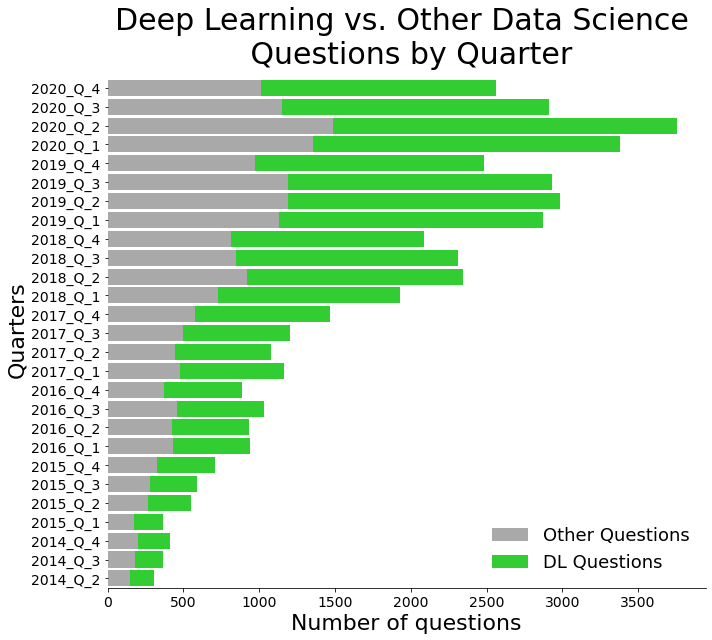

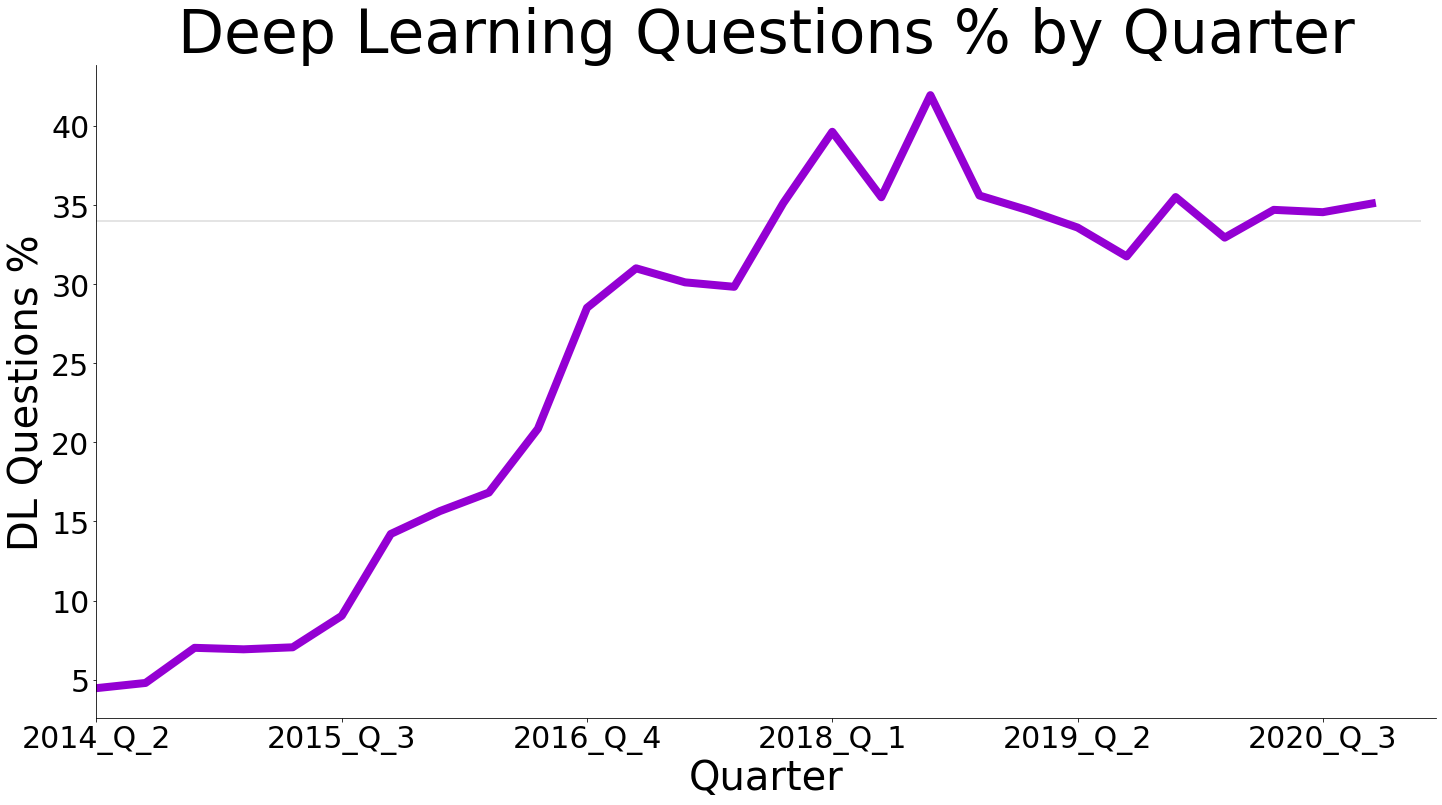

In [27]:
# CREATING A STACKED HORIZONTAL BAR PLOT FOR DL-RELATED AND OTHER QUESTIONS
#--------------------------------------------------------------------------

# Number of bars
N = len(questions_by_quarter)

# Data to plot
other_Q = questions_by_quarter['all_questions']-questions_by_quarter['dl_questions']
dl_Q = questions_by_quarter['all_questions']

# X locations for the groups
ind = np.arange(N)

# Bar width 
width = 0.85

# Plotting the results
fig = plt.figure(figsize=(10,9))
p1 = plt.barh(
              ind, 
              other_Q, 
              width, 
              color = 'darkgray'
              )
p2 = plt.barh(
              ind, 
              dl_Q, 
              width, 
              color = 'limegreen',
              left=other_Q
              )
plt.title('Deep Learning vs. Other Data Science \n Questions by Quarter', fontsize = 30)
plt.xlabel('Number of questions', fontsize=22)
plt.ylabel('Quarters', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(ind, questions_by_quarter['YearQuarter'], fontsize=14)
plt.legend(
           (p1[0], p2[0]), 
           ('Other Questions', 'DL Questions'), 
           frameon=False, 
           fontsize=18, 
           loc=4
           )
plt.ylim(-0.5,27)
plt.tight_layout()
sns.despine(left=True)
plt.show()
print('\n')

#--------------------------------------------------------------------------
# CREATING A LINE PLOT FOR THE PERCENTAGE OF DL-RELATED QUESTIONS BY QUARTER
#--------------------------------------------------------------------------
questions_by_quarter.plot(
                          figsize=(24,12),
                          x='YearQuarter', 
                          y='dl_questions_percent',
                          kind='line', 
                          xlim=0, 
                          linestyle='-', 
                          color='darkviolet', 
                          lw=8,
                          fontsize=30, 
                          legend=False
                          )
plt.xlabel('Quarter', fontsize=40)
plt.ylabel('DL Questions %', fontsize=40)
plt.title('Deep Learning Questions % by Quarter', fontsize=60)
plt.hlines(
           y=34, 
           xmin=0, 
           xmax=N,
           color='gainsboro',
           )
sns.despine()

In [28]:
# Counting the questions containing DL-related tags
dl_counter = 0
for lst in questions_all['Tags']:
    
    # Checking the intersection of `lst` and `dl_related_tags_list`
    if len(list(set(lst) & set(dl_related_tags_list))) > 0:
        dl_counter += 1
  
print(f'Overall percentage of DL-related questions: {round(dl_counter/len(questions_all)*100)}%')

Overall percentage of DL-related questions: 32%
